## BiLSTM_model_11: 이전 모델 중 가장 좋았던 model3(Dropout(0.5)+Stacked)에서 변형
- 빈도 1회 단어 제한
- embedding_dim: 50 -> 200
- Activation_function: RMSProp -> Adam


### khaiii 설치

In [1]:
!git clone https://github.com/kakao/khaiii.git

fatal: destination path 'khaiii' already exists and is not an empty directory.


In [2]:
!pip install cmake

In [3]:
!mkdir build

mkdir: cannot create directory ‘build’: File exists


In [4]:
!cd build && cmake /content/khaiii

-- [khaiii] fused multiply add option enabled
-- [hunter] Calculating Toolchain-SHA1
-- [hunter] Calculating Config-SHA1
-- [hunter] HUNTER_ROOT: /root/.hunter
-- [hunter] [ Hunter-ID: 70287b1 | Toolchain-ID: 02ccb06 | Config-ID: dffbc08 ]
-- [hunter] BOOST_ROOT: /root/.hunter/_Base/70287b1/02ccb06/dffbc08/Install (ver.: 1.68.0-p1)
-- Boost version: 1.68.0
-- [hunter] CXXOPTS_ROOT: /root/.hunter/_Base/70287b1/02ccb06/dffbc08/Install (ver.: 2.1.1-pre)
-- [hunter] EIGEN_ROOT: /root/.hunter/_Base/70287b1/02ccb06/dffbc08/Install (ver.: 3.3.5)
-- [hunter] FMT_ROOT: /root/.hunter/_Base/70287b1/02ccb06/dffbc08/Install (ver.: 4.1.0)
-- [hunter] GTEST_ROOT: /root/.hunter/_Base/70287b1/02ccb06/dffbc08/Install (ver.: 1.8.0-hunter-p11)
-- [hunter] NLOHMANN_JSON_ROOT: /root/.hunter/_Base/70287b1/02ccb06/dffbc08/Install (ver.: 3.3.0)
-- [hunter] SPDLOG_ROOT: /root/.hunter/_Base/70287b1/02ccb06/dffbc08/Install (ver.: 0.16.3-p1)
-- Configuring done
-- Generating done
-- Build files have been written t

In [5]:
!cd /content/build/ && make all

[ 65%] Built target obj_khaiii
[ 69%] Built target khaiii
[ 76%] Built target bin_khaiii
[100%] Built target test_khaiii


In [6]:
!cd /content/build/ && make resource

Built target resource


In [7]:
!cd /content/build && make install

[ 65%] Built target obj_khaiii
[ 69%] Built target khaiii
[ 76%] Built target bin_khaiii
[100%] Built target test_khaiii
Install the project...
-- Install configuration: ""
-- Up-to-date: /usr/local/include/khaiii
-- Up-to-date: /usr/local/include/khaiii/khaiii_dev.h
-- Up-to-date: /usr/local/include/khaiii/khaiii_api.h
-- Up-to-date: /usr/local/include/khaiii/KhaiiiApi.hpp
-- Up-to-date: /usr/local/share/khaiii
-- Up-to-date: /usr/local/share/khaiii/preanal.tri
-- Up-to-date: /usr/local/share/khaiii/hdn2tag.lin
-- Up-to-date: /usr/local/share/khaiii/restore.one
-- Up-to-date: /usr/local/share/khaiii/errpatch.len
-- Up-to-date: /usr/local/share/khaiii/embed.bin
-- Up-to-date: /usr/local/share/khaiii/errpatch.val
-- Up-to-date: /usr/local/share/khaiii/cnv2hdn.lin
-- Up-to-date: /usr/local/share/khaiii/restore.val
-- Up-to-date: /usr/local/share/khaiii/config.json
-- Up-to-date: /usr/local/share/khaiii/conv.2.fil
-- Up-to-date: /usr/local/share/khaiii/preanal.val
-- Up-to-date: /usr/loca

In [8]:
!cd /content/build && make package_python

Run CPack packaging tool for source...
CPack: Create package using ZIP
CPack: Install projects
CPack: - Install directory: /content/khaiii
CPack: Create package
CPack: - package: /content/build/khaiii-0.4.zip generated.
Built target package_python


In [9]:
!pip install /content/build/package_python

Processing ./build/package_python
  Created wheel for khaiii: filename=khaiii-0.4-cp37-none-any.whl size=22882411 sha256=7a3707b0e15dddbe02fee5881c563baced4f4b35abf0aa901b5d400e201ffda9
  Stored in directory: /tmp/pip-ephem-wheel-cache-r15ia4s2/wheels/6b/4d/23/84c4acc3ef5226ca75c4e3ad84c39a0654d11c3a9c1941193f
Successfully built khaiii
  Found existing installation: khaiii 0.4
    Uninstalling khaiii-0.4:
      Successfully uninstalled khaiii-0.4


## preprocessing

In [10]:
from khaiii import KhaiiiApi
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

In [11]:
api = KhaiiiApi()

def khaiii_tokenized(s):
  result = []
  for word in api.analyze(s):
    for morph in word.morphs:
      result.append(morph.lex)
  return result

In [12]:
DF = pd.read_excel('after_preprocessing_3emotion.xlsx')

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60857 entries, 0 to 60856
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  60857 non-null  object
 1   Emotion   60857 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 951.0+ KB


In [13]:
total_data = pd.DataFrame()

total_data['sentence'] = DF['Sentence']
total_data['emotion'] = DF['Emotion']

In [14]:
total_data.nunique()

sentence    60533
emotion         3
dtype: int64

In [15]:
total_data.drop_duplicates(subset=['sentence'], inplace=True) # 중복 데이터 제거

len(total_data)

60533

In [16]:
print(total_data.isnull().values.any()) # null 값 확인

False


In [17]:
total_data['emotion'].value_counts()

0    21104
1    19719
2    19710
Name: emotion, dtype: int64

In [18]:
train_data, validtest = train_test_split(total_data, test_size=0.2,
                                         random_state=2045)

print(len(train_data))
print(len(validtest))

48426
12107


In [19]:
valid_data, test_data = train_test_split(validtest, test_size=0.3,
                                         random_state=2045)

print(len(valid_data))
print(len(test_data))

8474
3633


In [20]:
train_data['tokenized'] = train_data['sentence'].apply(khaiii_tokenized)
valid_data['tokenized'] = valid_data['sentence'].apply(khaiii_tokenized)
test_data['tokenized'] = test_data['sentence'].apply(khaiii_tokenized)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [21]:
X_train = train_data['tokenized'].values
y_train = train_data['emotion'].values
X_valid = valid_data['tokenized'].values
y_valid = valid_data['emotion'].values
X_test= test_data['tokenized'].values
y_test = test_data['emotion'].values

In [22]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [23]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold -1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 27694
등장 빈도가 1번 이하인 희귀 단어의 수: 14367
단어 집합에서 희귀 단어의 비율: 51.87766303170361
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 1.9083736252058872


- 빈도 1회인 단어 제외
   - vocab_size = total_cnt -rare_cnt + 1

In [24]:
vocab_size = total_cnt -rare_cnt + 1

print(vocab_size)

13328


In [25]:
tokenizer = Tokenizer(vocab_size)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_valid = tokenizer.texts_to_sequences(X_valid)
X_test = tokenizer.texts_to_sequences(X_test)

최대 길이 : 131
평균 길이 : 15.249514723495643


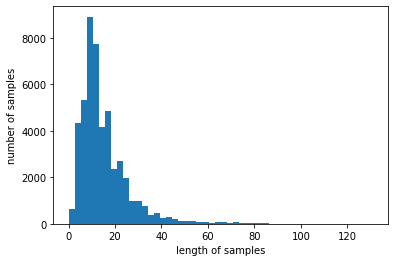

In [26]:
print('최대 길이 :',max(len(l) for l in X_train))
print('평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [27]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [28]:
max_len = 50
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 50 이하인 샘플의 비율: 98.10432412340478


In [29]:
X_train = pad_sequences(X_train, maxlen = max_len)
X_valid = pad_sequences(X_valid, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

In [30]:
y_train = to_categorical(y_train,3)
y_valid = to_categorical(y_valid,3)
y_test = to_categorical(y_test,3)

In [31]:
y_train.shape

(48426, 3)

## Word2Vec

In [32]:
X_train_tokenized = train_data['tokenized'].tolist()

In [33]:
X_valid_tokenized = valid_data['tokenized'].tolist()

In [34]:
tokenized_data = X_train_tokenized + X_valid_tokenized

In [35]:
len(tokenized_data)

56900

In [36]:
import gensim

word2vec = gensim.models.Word2Vec(sentences=tokenized_data,
                               size=200,
                               window=3,
                               min_count=1,
                               workers=4,
                               sg=1)

In [37]:
word2vec.wv.vectors.shape

(30226, 200)

In [38]:
vocab_size1 = word2vec.wv.vectors.shape[0]
embedding_dim = 200

embedding_matrix = np.zeros((vocab_size1, embedding_dim))

for word, idx in tokenizer.word_index.items():
  embedding_vector = word2vec[word] if word in word2vec else None
  if embedding_vector is not None:
    embedding_matrix[idx] = embedding_vector

embedding_matrix.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


(30226, 200)

In [39]:
embedding_matrix.shape

(30226, 200)

## modeling

> ## 1) Define


In [40]:
from tensorflow.keras.layers import Embedding, Dense, LSTM, Bidirectional, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import regularizers
from keras import models
from keras import layers

In [ ]:
from keras import backend as K

K.clear_session()

(3) Case11 : Dropout(Kernel_Regularizer) +  Stacked_Layer
   - embedding_dim = 50 -> 200
   - Activation_function = RMSProp -> Adam

In [41]:
model11 = Sequential()
model11.add(Embedding(vocab_size1, embedding_dim))
model11.add(Bidirectional(LSTM(128, return_sequences=True)))
model11.add(Dropout(0.5))
model11.add(LSTM(128, return_sequences = True))
model11.add(Dropout(0.5))
model11.add(Bidirectional(LSTM(64)))
model11.add(Dropout(0.5))
model11.add(Dense(3, activation='softmax'))

In [42]:
model11.layers[0].set_weights([embedding_matrix])
model11.layers[0].trainable=False
model11.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 200)         6045200   
_________________________________________________________________
bidirectional (Bidirectional (None, None, 256)         336896    
_________________________________________________________________
dropout (Dropout)            (None, None, 256)         0         
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 128)         197120    
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 128)         0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               98816     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0

> ### 2) Compile

In [44]:
model11.compile(loss = 'categorical_crossentropy', 
                optimizer = 'Adam', 
                metrics = ['accuracy'])

> ### 3) EarlyStopping() & ModelCheckpoint()

- ModelCheckpoint 이름 바꿔가면서 진행
   


In [45]:
es = EarlyStopping(monitor='val_loss', 
                   mode='min', 
                   verbose=1, 
                   patience=10)
mc = ModelCheckpoint('BiLSTM_model_11.h5', 
                     monitor='val_acc', 
                     mode='max', 
                     verbose=1, 
                     save_best_only=True)

> ### 4) Fit

- Case11 : Dropout(Kernel_Regularizer) + Stacked_Layer(Case3에서 변화)

  - val_accuary: 0.7704 -> 0.7754
  - 약 2분 -> 4분

In [46]:
%%time
history11 = model11.fit(X_train, y_train, epochs=50, callbacks=[es, mc],
                    batch_size=140, validation_data=(X_valid, y_valid))

Epoch 1/50
346/346 [==============================] - 47s 30ms/step - loss: 0.7932 - accuracy: 0.6306 - val_loss: 0.6505 - val_accuracy: 0.7245


Epoch 2/50
346/346 [==============================] - 9s 25ms/step - loss: 0.6548 - accuracy: 0.7233 - val_loss: 0.6096 - val_accuracy: 0.7440


Epoch 3/50
346/346 [==============================] - 9s 25ms/step - loss: 0.6135 - accuracy: 0.7453 - val_loss: 0.5855 - val_accuracy: 0.7544


Epoch 4/50
346/346 [==============================] - 9s 26ms/step - loss: 0.5878 - accuracy: 0.7569 - val_loss: 0.5622 - val_accuracy: 0.7636


Epoch 5/50
346/346 [==============================] - 9s 26ms/step - loss: 0.5851 - accuracy: 0.7570 - val_loss: 0.5694 - val_accuracy: 0.7633


Epoch 6/50
346/346 [==============================] - 9s 26ms/step - loss: 0.5663 - accuracy: 0.7663 - val_loss: 0.5451 - val_accuracy: 0.7728


Epoch 7/50
346/346 [==============================] - 9s 26ms/step - loss: 0.5526 - accuracy: 0.7773 - val_loss: 0.5499 - val_accuracy: 0.7713


Epoch 8/50
346/346 [==============================] - 9s 26ms/step - loss: 0.5499 - accuracy: 0.7719 - val_loss: 0.5486 - val_accuracy: 0.7661


Epoch 9/50
346/346 [==============================] - 9s 26ms/step - loss: 0.5294 - accuracy: 0.7814 - val_loss: 0.5490 - val_accuracy: 0.7739


Epoch 10/50
346/346 [==============================] - 9s 26ms/step - loss: 0.5197 - accuracy: 0.7861 - val_loss: 0.5513 - val_accuracy: 0.7715


Epoch 11/50
346/346 [==============================] - 9s 26ms/step - loss: 0.5182 - accuracy: 0.7896 - val_loss: 0.5397 - val_accuracy: 0.7754


Epoch 12/50
346/346 [==============================] - 9s 26ms/step - loss: 0.5075 - accuracy: 0.7910 - val_loss: 0.5426 - val_accuracy: 0.7726


Epoch 13/50
346/346 [==============================] - 9s 26ms/step - loss: 0.4895 - accuracy: 0.7997 - val_loss: 0.5455 - val_accuracy: 0.7737


Epoch 14/50
346/346 [==============================] - 9s 26ms/step - loss: 0.4827 - accuracy: 0.8024 - val_loss: 0.5483 - val_accuracy: 0.7720


Epoch 15/50
346/346 [==============================] - 9s 26ms/step - loss: 0.4747 - accuracy: 0.8022 - val_loss: 0.5680 - val_accuracy: 0.7748


Epoch 16/50
346/346 [==============================] - 9s 26ms/step - loss: 0.4573 - accuracy: 0.8135 - val_loss: 0.5623 - val_accuracy: 0.7754


Epoch 17/50
346/346 [==============================] - 9s 26ms/step - loss: 0.4469 - accuracy: 0.8161 - val_loss: 0.5555 - val_accuracy: 0.7733


Epoch 18/50
346/346 [==============================] - 9s 26ms/step - loss: 0.4307 - accuracy: 0.8231 - val_loss: 0.5950 - val_accuracy: 0.7738


Epoch 19/50
346/346 [==============================] - 9s 26ms/step - loss: 0.4213 - accuracy: 0.8271 - val_loss: 0.6010 - val_accuracy: 0.7730


Epoch 20/50
346/346 [==============================] - 9s 26ms/step - loss: 0.4020 - accuracy: 0.8353 - val_loss: 0.6033 - val_accuracy: 0.7673


Epoch 21/50
346/346 [==============================] - 9s 26ms/step - loss: 0.3836 - accuracy: 0.8437 - val_loss: 0.6287 - val_accuracy: 0.7640


Epoch 00021: early stopping
CPU times: user 3min 25s, sys: 21.4 s, total: 3min 46s
Wall time: 3min 45s


> ### 5) Visualization

- Accuaracy & Loss



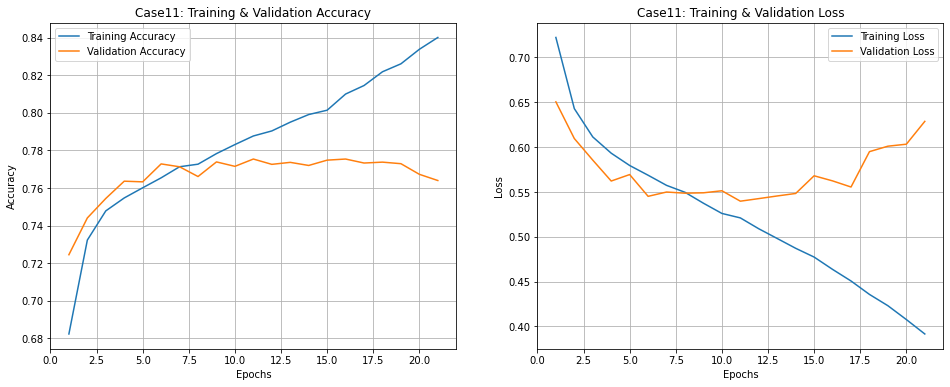

In [52]:
epochs1 = range(1, len(history11.history['val_accuracy']) + 1)
epochs10 = range(1, len(history11.history['val_loss']) + 1)

plt.figure(figsize = (16, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs1, history11.history['accuracy'])
plt.plot(epochs1, history11.history['val_accuracy'])
plt.title('Case11: Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy' , 'Validation Accuracy'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs10, history11.history['loss'])
plt.plot(epochs10, history11.history['val_loss'])
plt.title('Case11: Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss' , 'Validation Loss'])
plt.grid()
#
plt.show()
# 과적합 경향이 있다.

> ### 6) Predict

model3 -> model11
Accuracy: 0.7658 -> **0.7616**

In [48]:
loss, accuracy = model11.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))
# Accuracy 0.000

114/114 [==============================] - 1s 9ms/step - loss: 0.6254 - accuracy: 0.7616
Loss = 0.62541
Accuracy = 0.76163


In [54]:
df_result = pd.DataFrame({"Model" : ['1:Stacked', '2:Drop', '3:Drop+Stacked', '4:Batch+Stacked', 
                                     '5:L2+Stacked', '6:Batch+Drop+Stacked', '7:Batch+L2+Stacked',
                                     '8:Drop+L2+Stacked', '9:Drop+L2+Batch+Stacked','11:Case3_Var'],                                               
                          "Test_Accuracy" : ['0.7355','0.7633','0.7658','0.7286','0.7561',
                                             '0.7630','0.7344','0.7641','0.7622','0.7616'],
                           "Valid_Accuracy" : ['0.7660','0.7755','0.7704','0.7623','0.7689',
                                             '0.7747','0.7684','0.7741','0.7745','0.7754']})
                          
df_result.sort_values(by=['Test_Accuracy'], axis=0, ascending = False)


,Model,Test_Accuracy,Valid_Accuracy
2,3:Drop+Stacked,0.7658,0.7704
7,8:Drop+L2+Stacked,0.7641,0.7741
1,2:Drop,0.7633,0.7755
5,6:Batch+Drop+Stacked,0.7630,0.7747
8,9:Drop+L2+Batch+Stacked,0.7622,0.7745
9,11:Case3_Var,0.7616,0.7754
4,5:L2+Stacked,0.7561,0.7689
0,1:Stacked,0.7355,0.7660
6,7:Batch+L2+Stacked,0.7344,0.7684
3,4:Batch+Stacked,0.7286,0.7623


**결론**: Dropout 모델이 가장 높게 나와서 Drop 비율을 0.2 ~ 0.6까지 다르게 적용해봤는데, 0.5보다 클 때는 없었다. 

## Test

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model3.save('/content/drive/My Drive/Colab Notebooks/models/BiLSTM_model_11.h5')

In [ ]:
y_pred = model3.predict(X_test)
y_pred_final = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

In [ ]:
cnt = [0, 0, 0]

for i in range(len(y_test)):
  if y_pred_final[i] != y_true[i]:
    print(f'pred: {y_pred_final[i]} / answer: {y_true[i]}')
    n = y_pred_final[i]
    cnt[n] += 1

print('\n', cnt)
print(len(y_test))

# 긍정(0)을 가장 많이 틀렸고, 중립(2)을 가장 많이 맞췄다. 
# 전체 3633개 중 851개 틀렸고, 약 77% 정도 답을 맞춘 것이다. 

pred: 1 / answer: 2
pred: 1 / answer: 0
pred: 0 / answer: 1
pred: 0 / answer: 1
pred: 1 / answer: 0
pred: 1 / answer: 0
pred: 0 / answer: 2
pred: 1 / answer: 2
pred: 0 / answer: 1
pred: 1 / answer: 0
pred: 1 / answer: 0
pred: 0 / answer: 1
pred: 2 / answer: 0
pred: 0 / answer: 1
pred: 2 / answer: 0
pred: 2 / answer: 1
pred: 1 / answer: 0
pred: 1 / answer: 0
pred: 0 / answer: 1
pred: 1 / answer: 2
pred: 0 / answer: 1
pred: 0 / answer: 1
pred: 2 / answer: 1
pred: 1 / answer: 0
pred: 0 / answer: 1
pred: 0 / answer: 2
pred: 0 / answer: 2
pred: 1 / answer: 2
pred: 0 / answer: 2
pred: 1 / answer: 0
pred: 0 / answer: 1
pred: 1 / answer: 0
pred: 0 / answer: 2
pred: 1 / answer: 0
pred: 1 / answer: 2
pred: 0 / answer: 1
pred: 0 / answer: 1
pred: 1 / answer: 0
pred: 1 / answer: 2
pred: 2 / answer: 1
pred: 1 / answer: 0
pred: 2 / answer: 1
pred: 0 / answer: 1
pred: 0 / answer: 1
pred: 0 / answer: 2
pred: 2 / answer: 0
pred: 1 / answer: 0
pred: 0 / answer: 1
pred: 1 / answer: 0
pred: 2 / answer: 0
